In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [2]:
olist_customers_dataset = pd.read_csv("olist_customers_dataset.csv")
olist_geolocation_dataset = pd.read_csv("olist_geolocation_dataset.csv")
olist_order_items_dataset = pd.read_csv("olist_order_items_dataset.csv")
olist_order_payments_dataset = pd.read_csv("olist_order_payments_dataset.csv")
olist_order_reviews_dataset = pd.read_csv("olist_order_reviews_dataset.csv")
olist_orders_dataset = pd.read_csv("olist_orders_dataset.csv")
olist_products_dataset = pd.read_csv("olist_products_dataset.csv")
olist_sellers_dataset = pd.read_csv("olist_sellers_dataset.csv")
product_category_name_translation = pd.read_csv("product_category_name_translation.csv")
olist_marketing_qualified_leads_dataset = pd.read_csv("olist_marketing_qualified_leads_dataset.csv")
olist_closed_deals_dataset = pd.read_csv("olist_closed_deals_dataset.csv")

In [3]:
olist_geolocation_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [4]:
olist_customers_dataset = olist_customers_dataset.rename(columns = {"customer_zip_code_prefix": "zip_code_prefix"})
olist_geolocation_dataset = olist_geolocation_dataset.rename(columns = {"geolocation_zip_code_prefix": "zip_code_prefix"})
olist_PD_dataset = olist_customers_dataset.merge(olist_geolocation_dataset, on="zip_code_prefix", how = 'left')

In [5]:
olist_PD_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15083733 entries, 0 to 15083732
Data columns (total 9 columns):
 #   Column              Dtype  
---  ------              -----  
 0   customer_id         object 
 1   customer_unique_id  object 
 2   zip_code_prefix     int64  
 3   customer_city       object 
 4   customer_state      object 
 5   geolocation_lat     float64
 6   geolocation_lng     float64
 7   geolocation_city    object 
 8   geolocation_state   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 1.1+ GB


In [6]:
olist_sellers_dataset = olist_sellers_dataset.rename(columns = {"seller_zip_code_prefix": "zip_code_prefix"})
olist_PD_dataset = olist_PD_dataset.merge(olist_sellers_dataset, on="zip_code_prefix", how = 'left')

In [7]:
olist_PD_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20333829 entries, 0 to 20333828
Data columns (total 12 columns):
 #   Column              Dtype  
---  ------              -----  
 0   customer_id         object 
 1   customer_unique_id  object 
 2   zip_code_prefix     int64  
 3   customer_city       object 
 4   customer_state      object 
 5   geolocation_lat     float64
 6   geolocation_lng     float64
 7   geolocation_city    object 
 8   geolocation_state   object 
 9   seller_id           object 
 10  seller_city         object 
 11  seller_state        object 
dtypes: float64(2), int64(1), object(9)
memory usage: 2.0+ GB


From the kaggle website,there are 
olist_sellers_dataset: 3095 unique values(sellers_ID)
olist_order_customer_dataset: 96096 unique values(customers_ID)

In [8]:
def basic_single_variate_analysis(dataframe, var):
    f, axes = plt.subplots(1, 3, figsize=(10, 10))
    sb.boxplot(data = dataframe[var], orient = "h", color='g', ax = axes[0])
    sb.histplot(data = dataframe[var], ax = axes[1])
    sb.violinplot(data = dataframe[var], orient = "h", color='r', ax = axes[2])

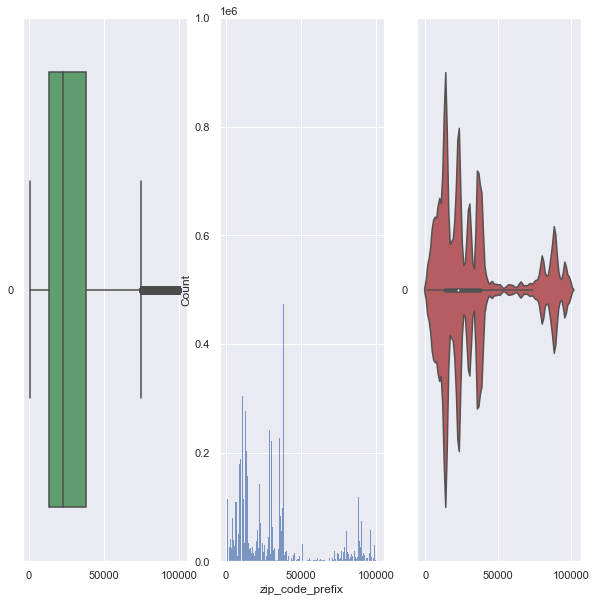

In [9]:
basic_single_variate_analysis(olist_PD_dataset, 'zip_code_prefix')

In [10]:
olist_PD = pd.DataFrame(olist_PD_dataset[['zip_code_prefix','customer_unique_id','customer_city','customer_state','seller_id','seller_city','seller_state']])

In [11]:
olist_PD['seller_city'] = olist_PD['seller_city'].astype('category')
olist_PD['seller_state'] = olist_PD['seller_state'].astype('category')
olist_PD['customer_city'] = olist_PD['customer_city'].astype('category')
olist_PD['customer_state'] = olist_PD['customer_state'].astype('category')

In [12]:
olist_PD.head()

,zip_code_prefix,customer_unique_id,customer_city,customer_state,seller_id,seller_city,seller_state
0,14409,861eff4711a542e4b93843c6dd7febb0,franca,SP,NaN,NaN,NaN
1,14409,861eff4711a542e4b93843c6dd7febb0,franca,SP,NaN,NaN,NaN
2,14409,861eff4711a542e4b93843c6dd7febb0,franca,SP,NaN,NaN,NaN
3,14409,861eff4711a542e4b93843c6dd7febb0,franca,SP,NaN,NaN,NaN
4,14409,861eff4711a542e4b93843c6dd7febb0,franca,SP,NaN,NaN,NaN


<AxesSubplot:xlabel='zip_code_prefix', ylabel='Count'>

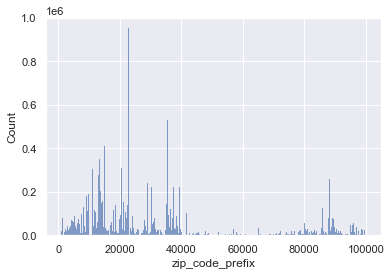

In [13]:
   sb.histplot(data = olist_PD['zip_code_prefix'])

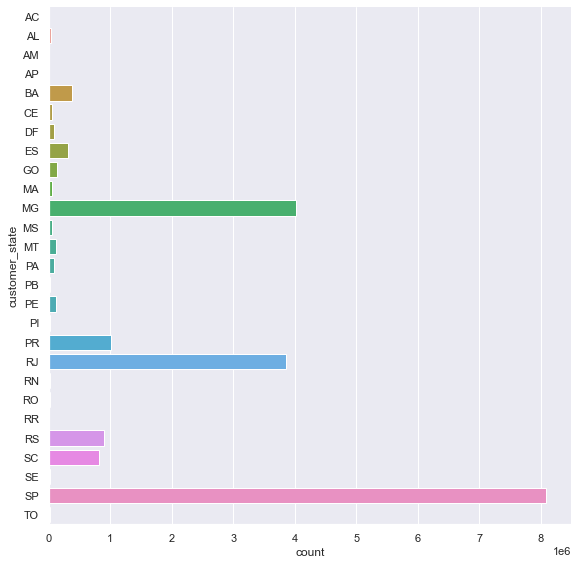

In [14]:
sb.catplot(y = 'customer_state', data = olist_PD, kind = "count", height = 8)

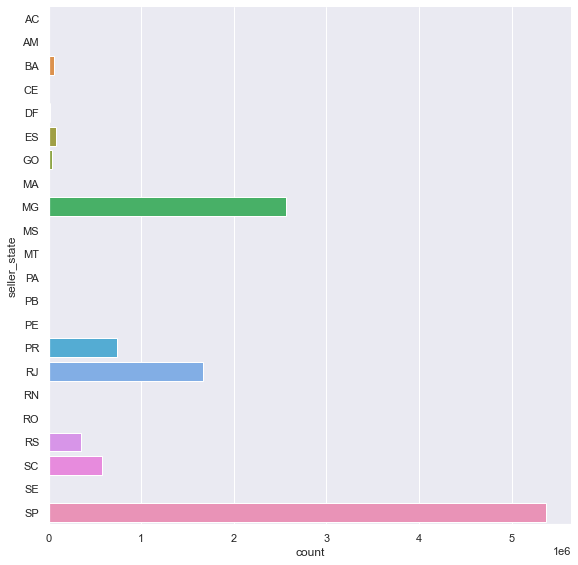

In [15]:
sb.catplot(y = 'seller_state', data = olist_PD, kind = "count", height = 8)